# **Fantasy Sports Clustering Analysis**

## **Importing the necessary libraries and overview of the dataset**

In [1]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# Importing PCA
from sklearn.decomposition import PCA

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Import the data
data = pd.read_csv(r"C:\TY IT\Sem - 2\ML\Projects\Fantasy-Sports-Clustering-Analysis-main\Fantasy-Sports-Clustering-Analysis-main\fpl_data.csv")

In [44]:
# Checking the shape of the data
data.shape

(476, 13)

Shows the 476 players with 13 features

In [45]:
# View randome sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [46]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


* `Player_Name` `Club` `Position`, are the only object type columns the rest are numerical
* Of the 476 players and 13 columns there are no missing values 

In [47]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [48]:
# Check for duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [49]:
# Check for missing values in the data
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

There are no missing values

## **Exploratory Data Analysis**

**Check the statistical summary of the data**

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


### **Univariate Analysis**

In [51]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

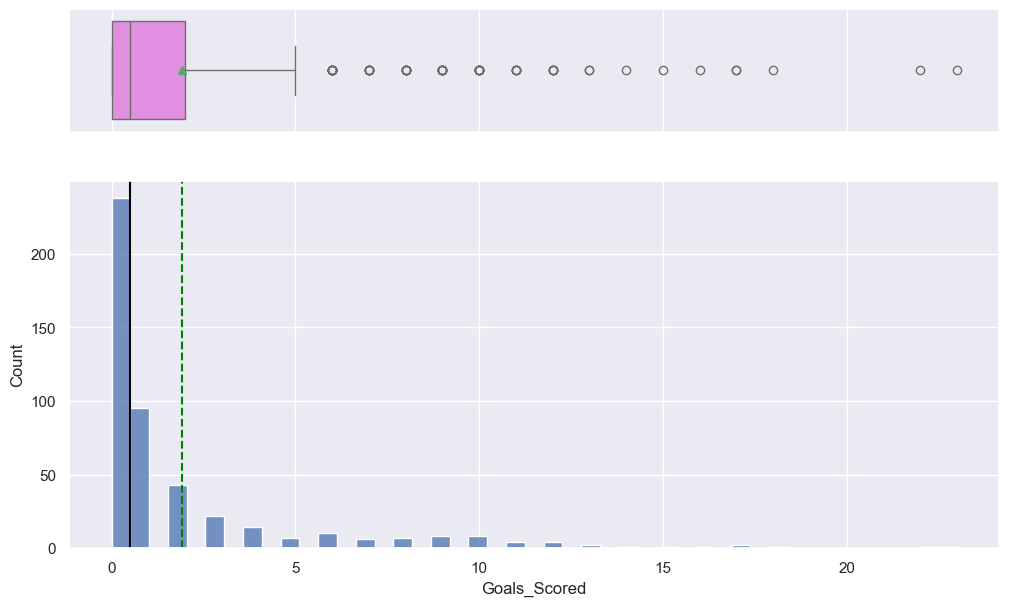

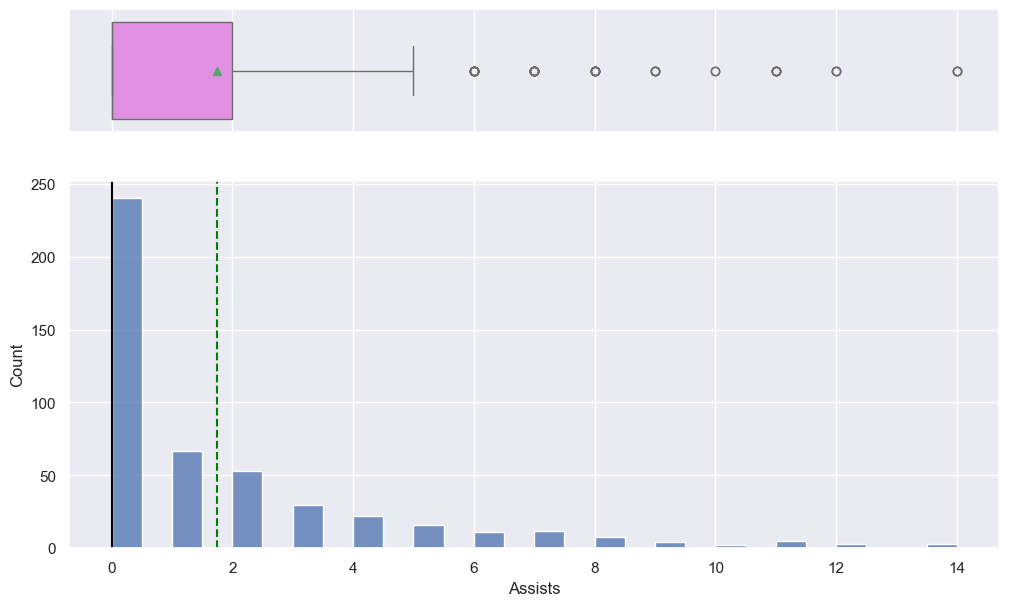

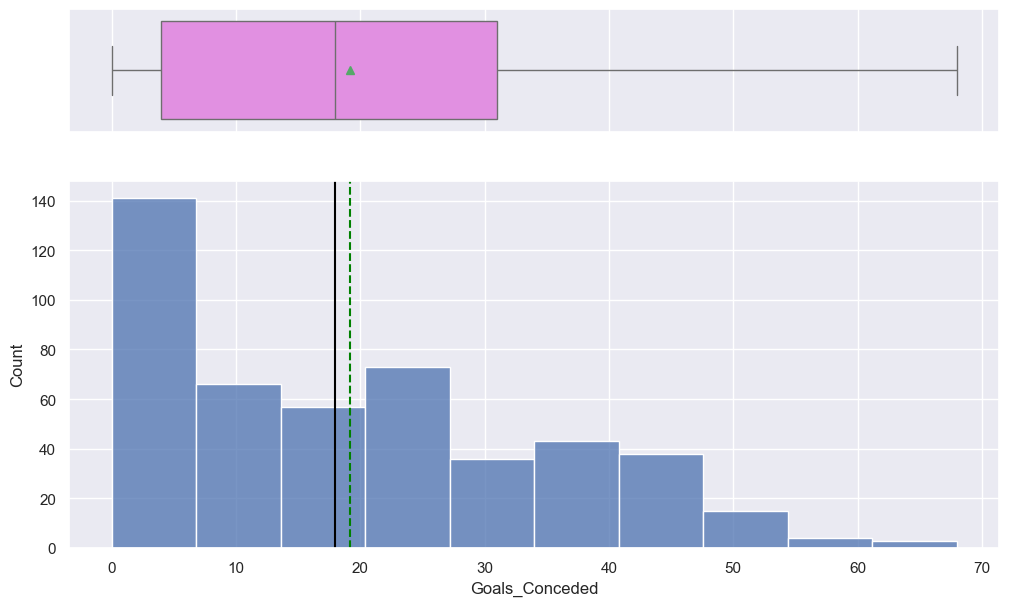

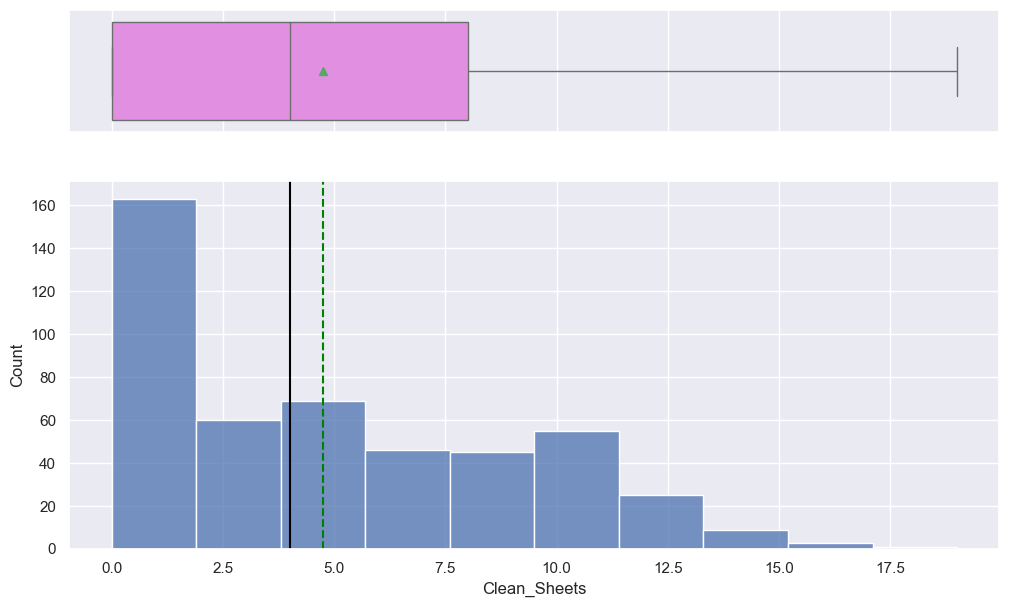

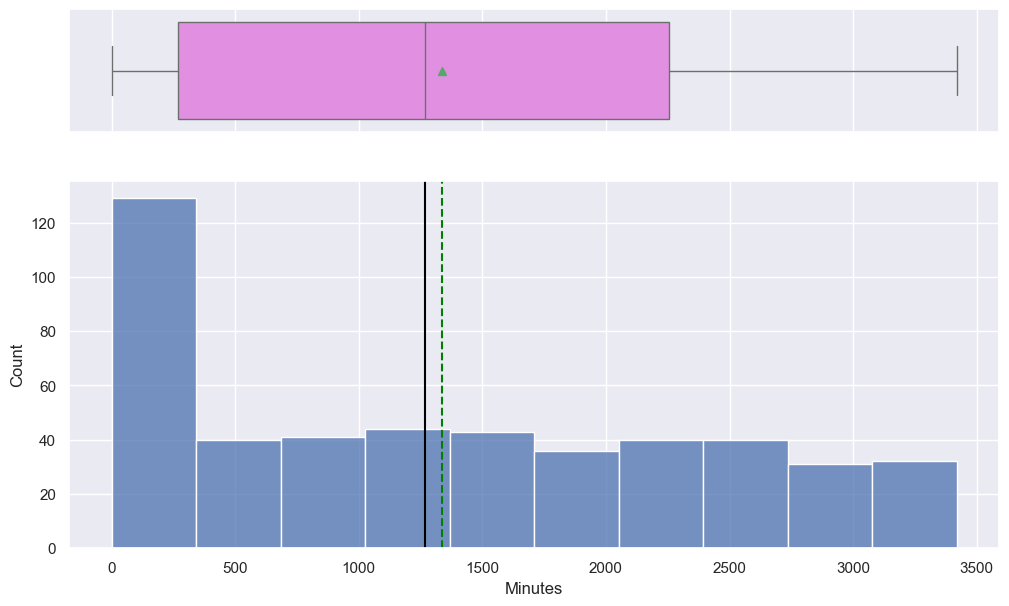

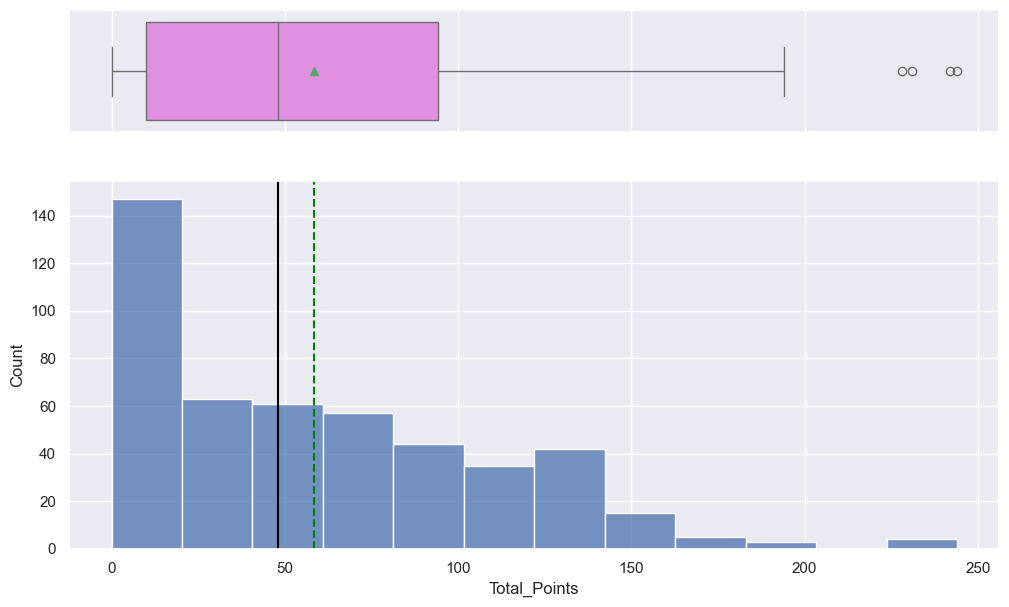

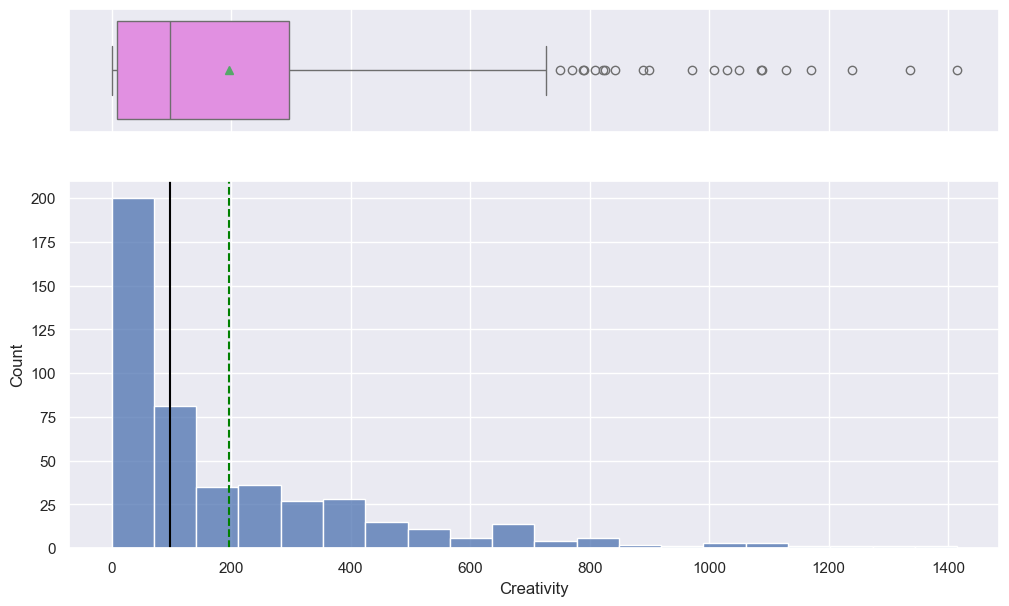

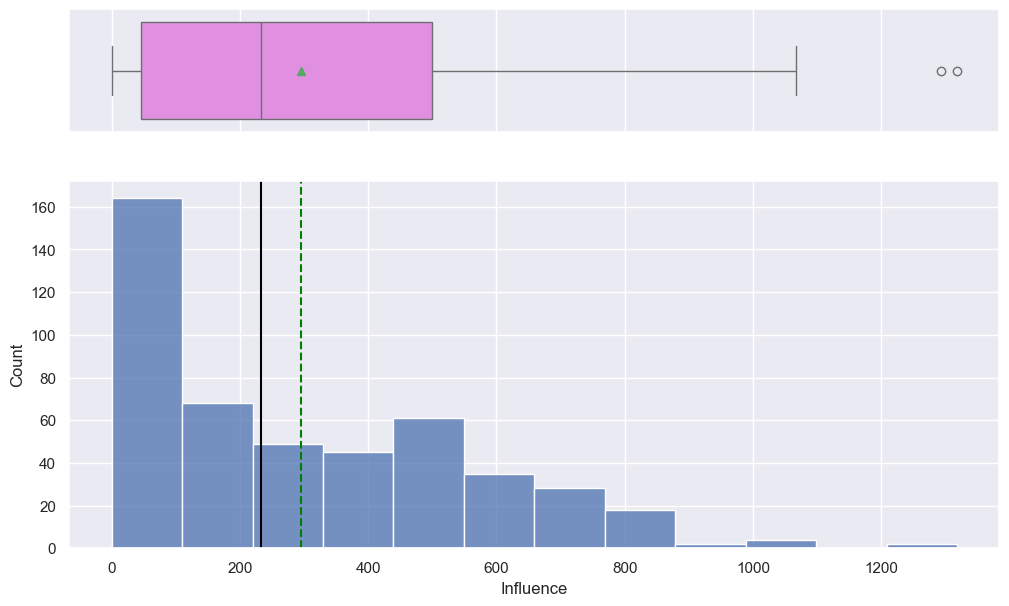

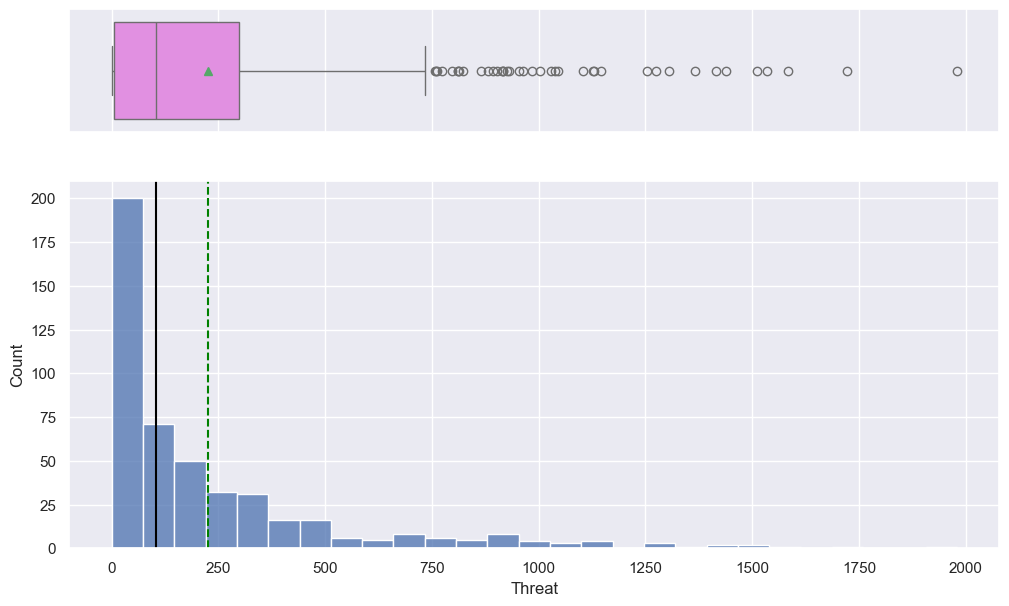

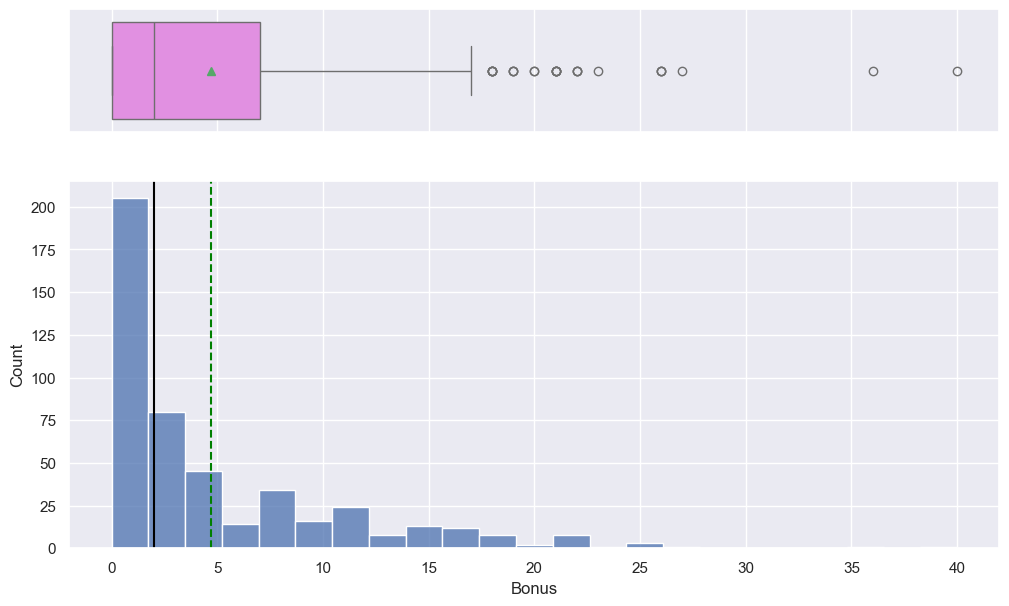

In [52]:
histogram_boxplot(df, 'Goals_Scored')
histogram_boxplot(df, 'Assists')  
histogram_boxplot(df, 'Goals_Conceded')
histogram_boxplot(df, 'Clean_Sheets')
histogram_boxplot(df, 'Minutes')
histogram_boxplot(df, 'Total_Points')
histogram_boxplot(df, 'Creativity')
histogram_boxplot(df, 'Influence')
histogram_boxplot(df, 'Threat')
histogram_boxplot(df, 'Bonus')

**Observations and Insights:**
The **right skewed nature** consistent through all plots indicate this is **not likely due to outliers** but rather an natural imbalance in the players. This imbalance likely stems from one of two factors:
* Players who are higher performers.
* Certain positions that tend to rank higher on the measurable features. 

In [53]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

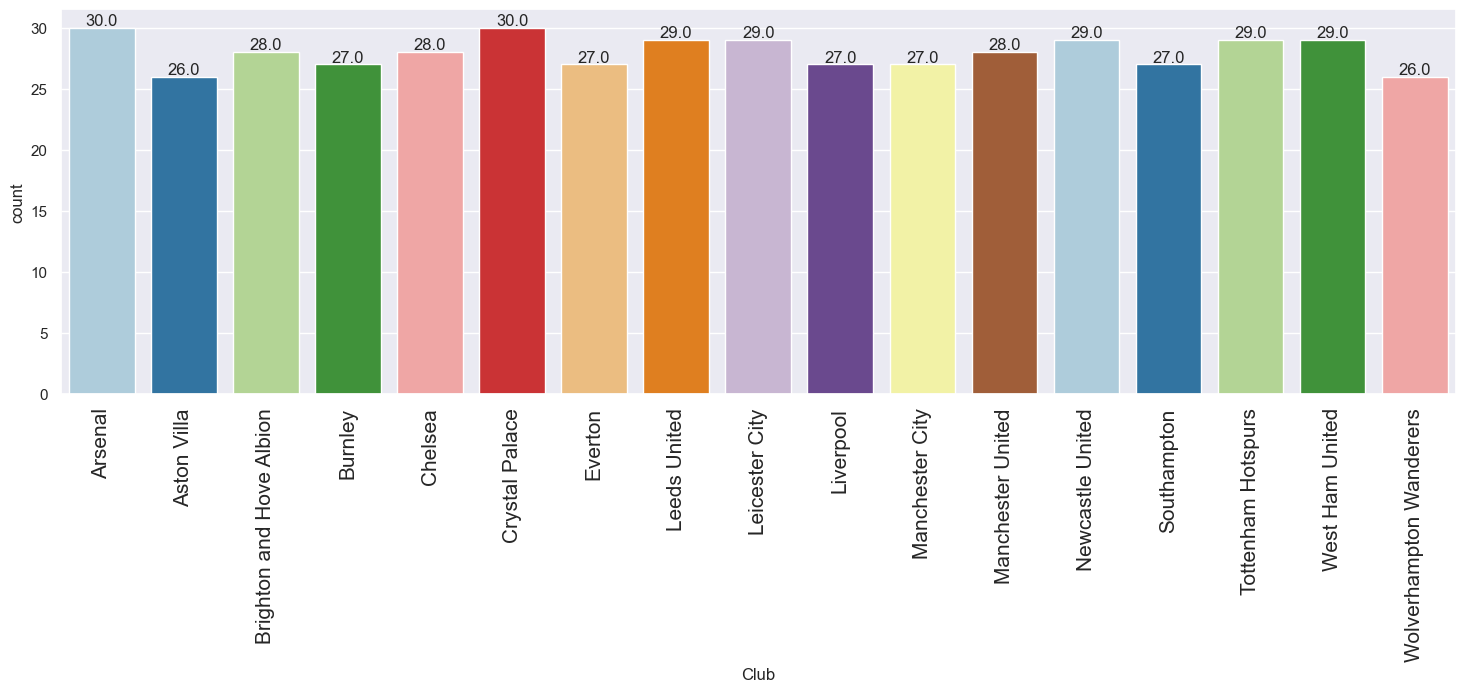

In [54]:
labeled_barplot(df, 'Club')

Reletively **uniform distribution** of players from each club, should help to minimize potential errors from imbalanced data. 

**`Position`**

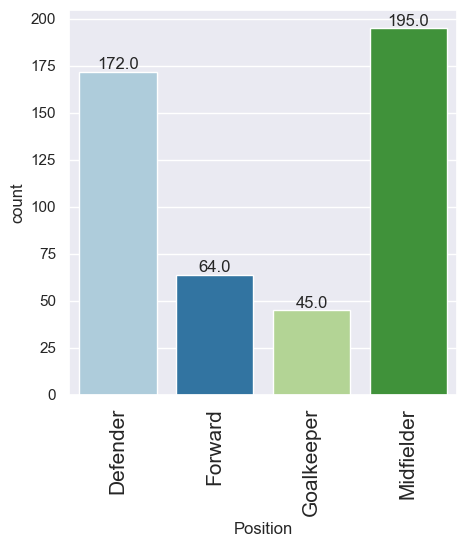

In [55]:
labeled_barplot(df, 'Position')

Of the 11 players on the field depending on the formation there is 1 goalie, 3-5 defenders, 4-5 midfielders, 1-3 forwards. 
* The split shown above matches those ratios with positions ranked as: 
    * Number of Midfielders > Defenders > Forwards > Goalkeepers. 
* Given the number of Clubs and Goal Keepers, each club has on average 2-3 goal keepers.

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

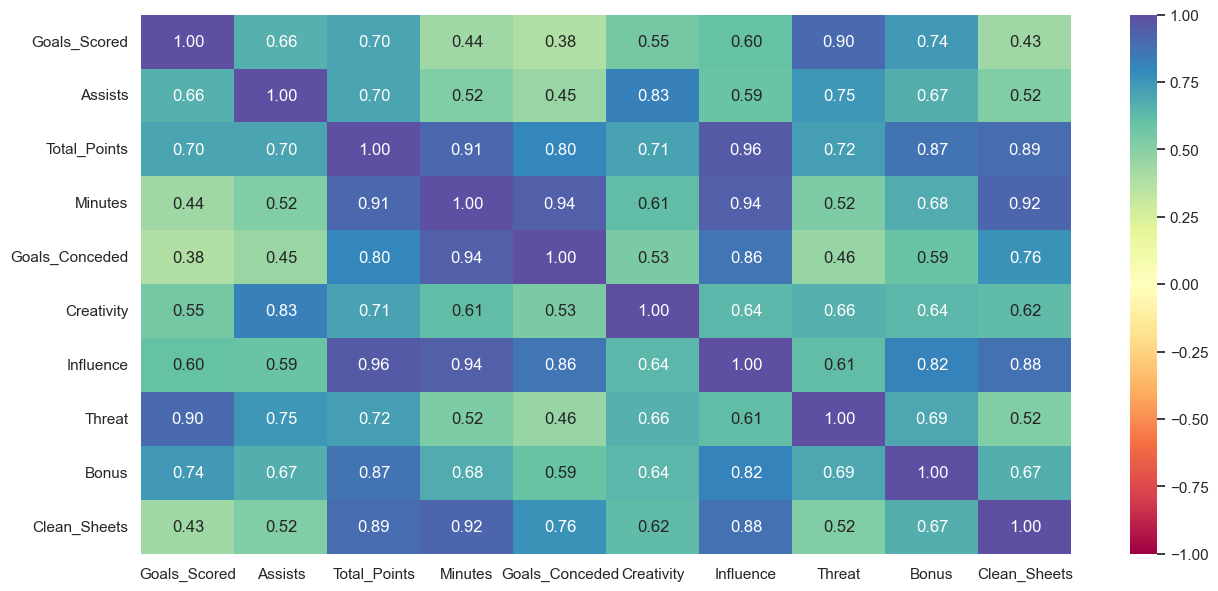

In [56]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Check which players from which team have scored the most fantasy points on average.**

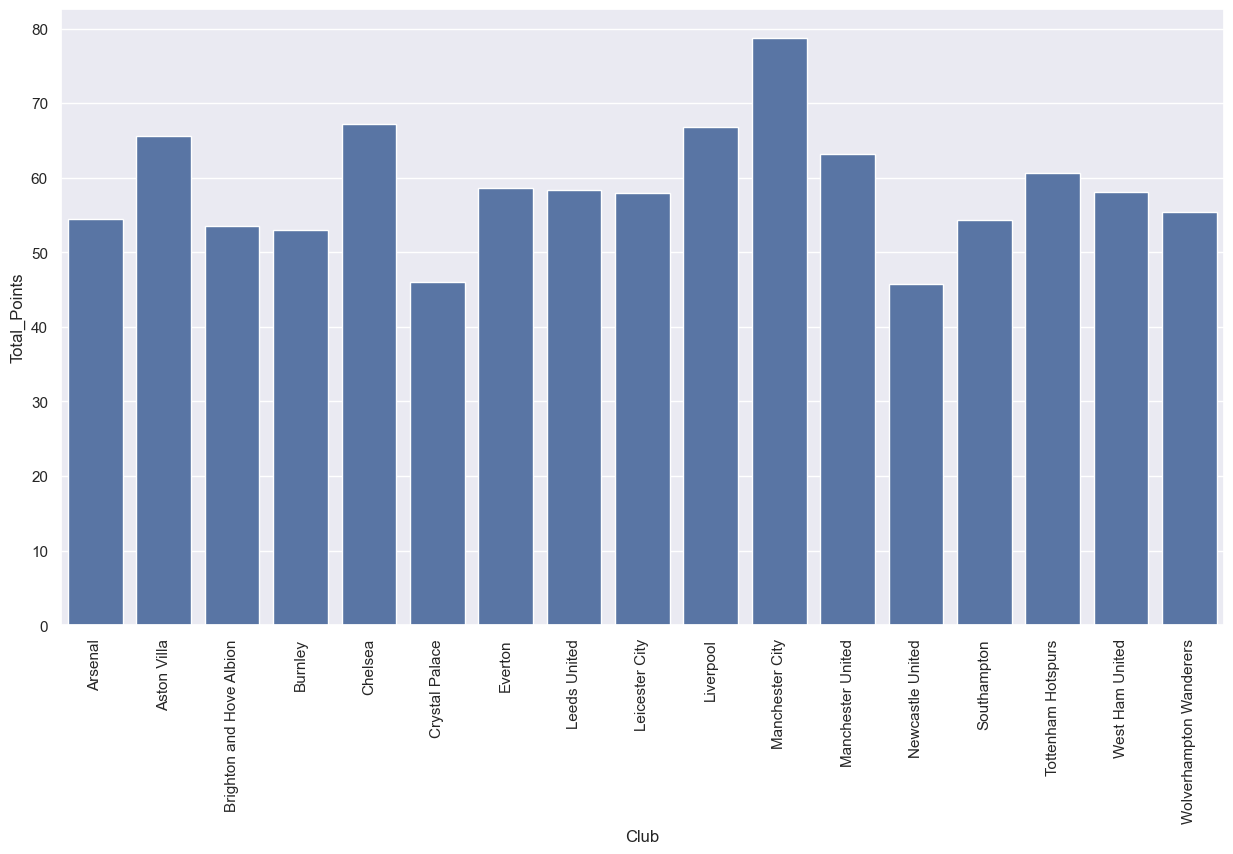

In [57]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Club' , y = 'Total_Points' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

Manchester City is the leader in points while Crystal Palace, and Newcastle United have the lowest number of points. 

**We hypothesied that players in different positions have score more goals. Check which positions tend to score more fantasy points on average.**

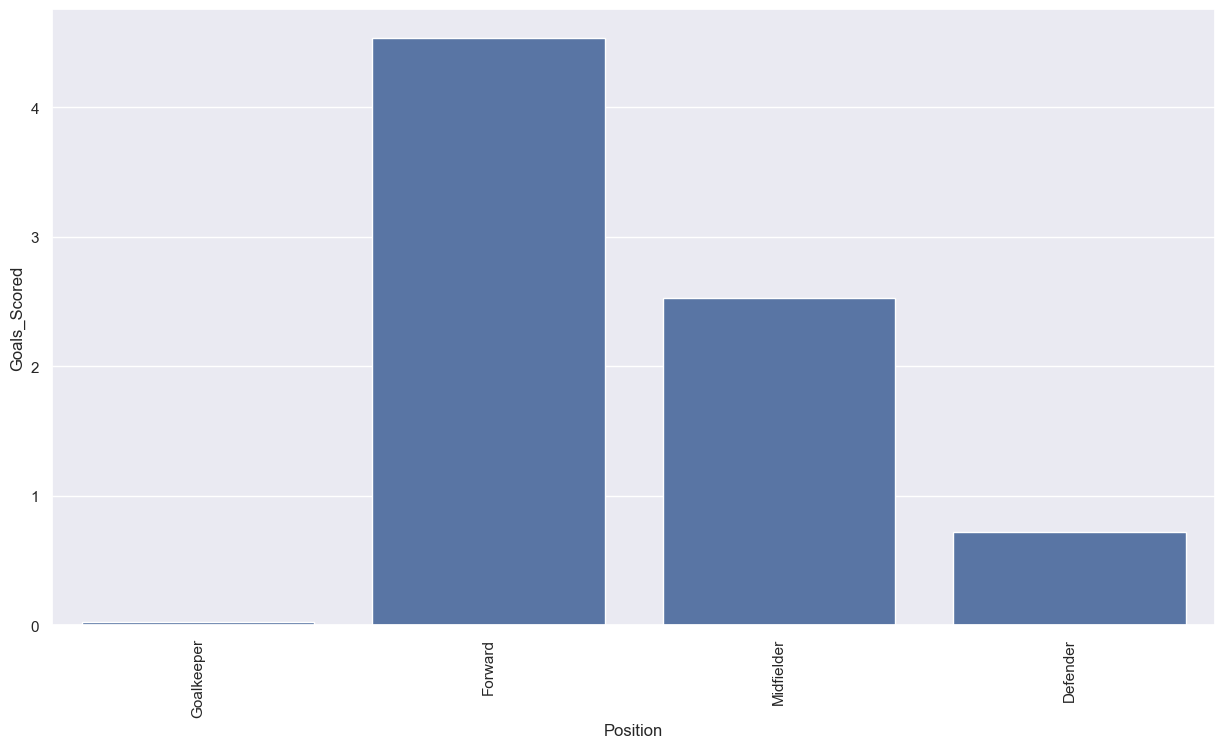

In [58]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Goals_Scored' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

As expected Forwards score the most goals followed by Midfielders at a little more than half as many and Defenders with half as many as that. 

**Check if the same is true for the number of points.**

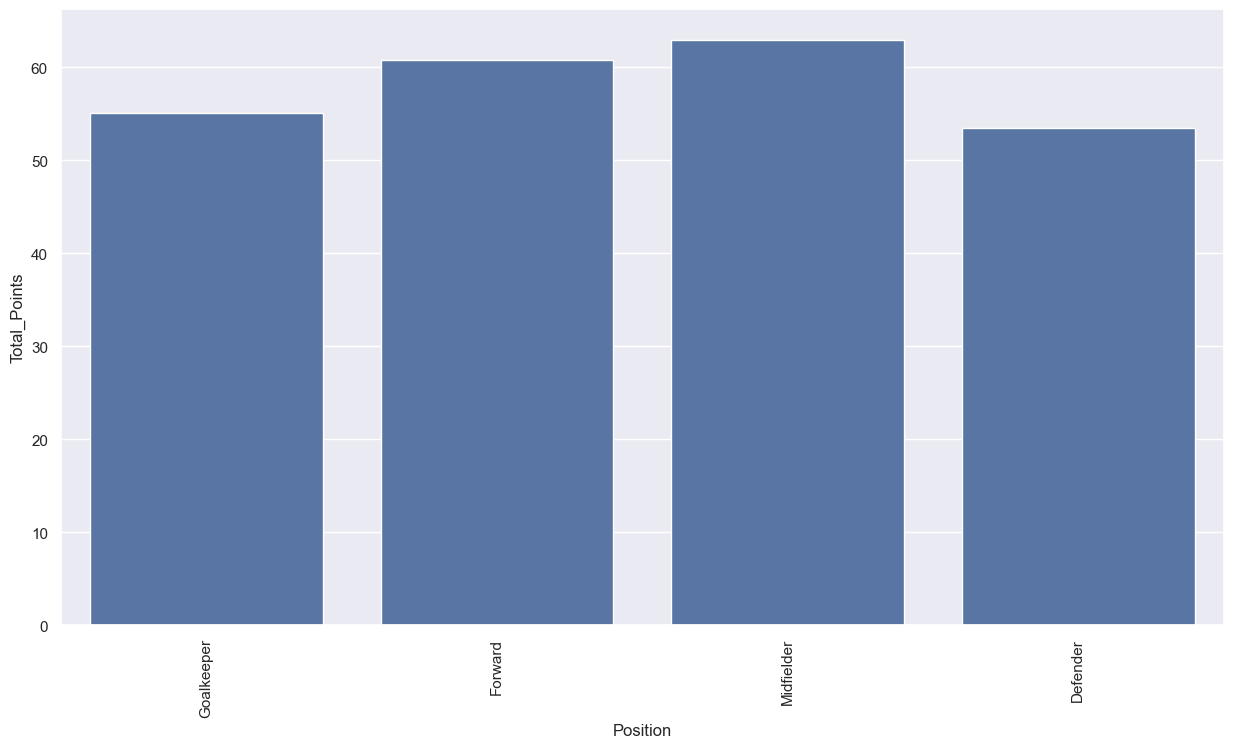

In [59]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Total_Points' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

Total number of points is much more evenly distributed through the positions, with Midfielders > Fowards > Defenders > Goalkeepers.

**Which players scored the most fantasy points last season for different positions of play.**

In [60]:
import pandas as pd

best_df = pd.DataFrame()  # Ensure best_df is a pandas DataFrame

In [63]:
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over pos_list and filter DataFrame for each position
for pos in pos_list:
    df_aux = df[df.Position == pos]
    
    # Filter for rows with maximum Total_Points for each position
    max_points = df_aux.Total_Points.max()
    df_max_points = df_aux[df_aux.Total_Points == max_points]
    
    # Append the filtered DataFrame to the list
    dfs.append(df_max_points[['Player_Name', 'Club', 'Position', 'Total_Points']])

# Concatenate all DataFrames in the list
best_df = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
best_df.reset_index(drop=True, inplace=True)

best_df


,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Harry Kane,Tottenham Hotspurs,Forward,242
2,Bruno Fernandes,Manchester United,Midfielder,244
3,Stuart Dallas,Leeds United,Defender,171


**Let's see the top 5 players with the most fantasy points last season for different positions of play.**

In [65]:
import pandas as pd

best5_dfs = []

for pos in pos_list:
    df_aux = df[df.Position == pos]
    
    # Sort DataFrame by Total_Points in descending order, then take top 5 rows
    df_top5 = df_aux.sort_values('Total_Points', ascending=False).head(5)
    
    best5_dfs.append(df_top5[['Player_Name', 'Club', 'Position', 'Total_Points']])

# Concatenate all DataFrames in the list
best5_df = pd.concat(best5_dfs)

best5_df.reset_index(drop=True, inplace=True)

best5_df


,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Harry Kane,Tottenham Hotspurs,Forward,242
6,Patrick Bamford,Leeds United,Forward,194
7,Jamie Vardy,Leicester City,Forward,187
8,Ollie Watkins,Aston Villa,Forward,168
9,Dominic Calvert-Lewin,Everton,Forward,165


### **Outlier Check**

- Plot boxplots of all numerical columns to check for outliers.

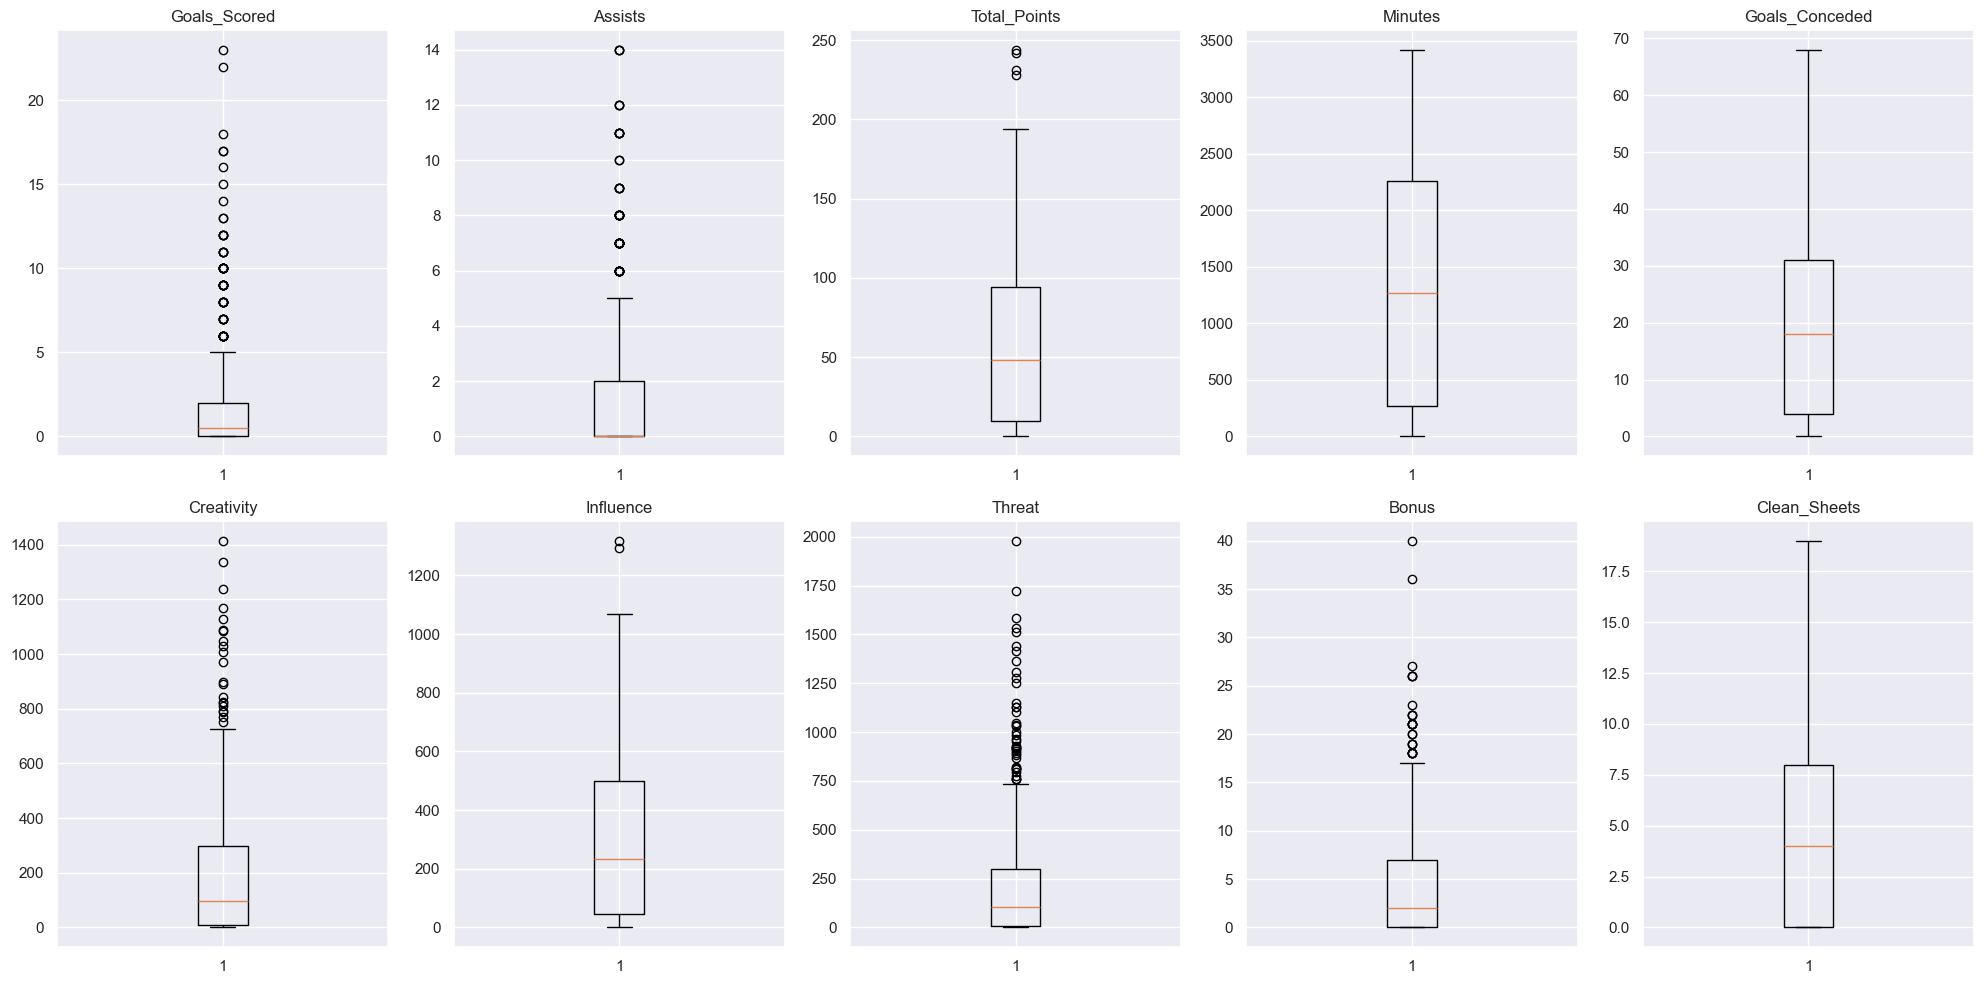

In [66]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Scaling**

- Scale the data before we proceed with clustering.

In [67]:
# Scaling the data before clustering
scaler = StandardScaler() # Initialize the Standard Scaler

subset = df.iloc[:, 3:].copy()  # Data with numerical features

subset_scaled = scaler.fit_transform(subset) # Fit_transform the scaler function on data subset

In [68]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**
PCA is a dimentionality reduction function that makes clustering easier

In [69]:
# Defining the number of principal components to generate
n = subset.shape[1]                                    # Storing the number of variables in the subset data
# returns 10 as that is the number of numerical features

pca = PCA(n_components = n, random_state = 1)          # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df))              # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

## **K-Means Clustering**

In [70]:
# copy of the pca data frame for k-means
k_means_df = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.7730371100978024
Number of Clusters: 2 	Average Distortion: 1.863573678589827
Number of Clusters: 3 	Average Distortion: 1.5612774038101604
Number of Clusters: 4 	Average Distortion: 1.3557368359611874
Number of Clusters: 5 	Average Distortion: 1.293154169974169
Number of Clusters: 6 	Average Distortion: 1.2242272213869854
Number of Clusters: 7 	Average Distortion: 1.16103087471314
Number of Clusters: 8 	Average Distortion: 1.1103362182250378
Number of Clusters: 9 	Average Distortion: 1.0659533211208416
Number of Clusters: 10 	Average Distortion: 1.0174279276513458
Number of Clusters: 11 	Average Distortion: 1.00214224426889
Number of Clusters: 12 	Average Distortion: 0.9834185498732169
Number of Clusters: 13 	Average Distortion: 0.9673126134780367
Number of Clusters: 14 	Average Distortion: 0.9475014323727121


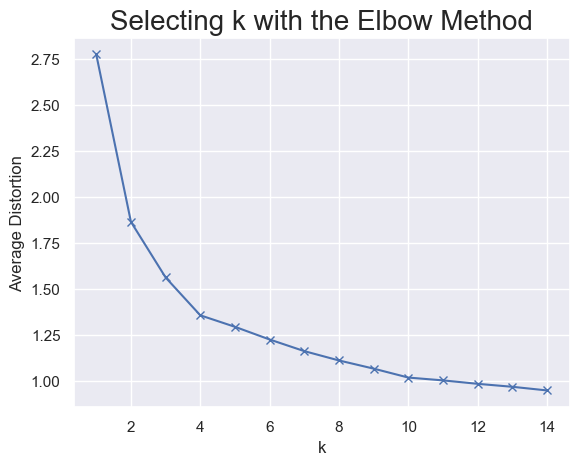

In [71]:
# determin k value

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1)
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations and Insights:**

- We will move ahead with k = 4 as this is when the graph starts to move nearly parallel to the X-axis. 

In [72]:
# Create K-Means with nclusters = 4
kmeans = KMeans(n_clusters = 4, random_state = 1) 

kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [73]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [82]:
# groupby the cluster labels
km_cluster_profile = df1.groupby("KM_segments").mean()

TypeError: Could not convert Bernd LenoGranit XhakaHector BellerinKieran TierneyRob HoldingDouglas Luiz Soares de PauloEmiliano MartinezEzri Konsa NgoyoJohn McGinnMatt TargettMatthew CashTyrone MingsAdam WebsterBen WhiteJoel VeltmanLewis DunkRobert SanchezYves BissoumaAshley WestwoodBen MeeCharlie TaylorDwight McNeilJames TarkowskiJosh BrownhillMatthew LowtonNick PopeBenjamin ChilwellCesar AzpilicuetaEdouard MendyJorge Luiz Frello FilhoKurt ZoumaReece JamesThiago SilvaAndros TownsendCheikhou KouyateJoel WardLuka MilivojevicVicente GuaitaAbdoulaye DoucoureBen GodfreyJordan PickfordLucas DigneMason HolgateMichael KeaneEzgjan AlioskiIllan MeslierKalvin PhillipsLiam CooperLuke AylingMateusz KlichJames JustinJonny EvansKasper SchmeichelTimothy CastagneWesley FofanaWilfred NdidiAlisson BeckerFabio Henrique TavaresGeorginio WijnaldumBernardo SilvaEderson MoaresJoao CanceloJohn StonesRodrigo HernandezRuben DiasAaron Wan-BissakaDavid de GeaFrederico Rodrigues de Paula SantosHarry MaguirePaul PogbaScott McTominayVictor LindelofJonjo ShelveyKarl DarlowMiguel AlmironAlex McCarthyJan BednarekJannik VestergaardKyle Walker-PetersRyan BertrandStuart ArmstrongEric DierHugo LlorisPierre-Emile HojbjergSergio ReguilonTanguy NdombeleToby AlderweireldAngelo OgbonnaDeclan RiceLukasz FabianskiVladimir CoufalAdama TraoreConor CoadyJoao Santos MoutinhoLeander DendonckerNelson SemedoRomain SaissRuben NevesRui Pedro Patricio to numeric

In [ ]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values) 

In [31]:
# Highlight the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.460938,1.601562,55.648438,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
1,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
2,9.147541,6.639344,141.557377,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
3,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [32]:
# print the players in each cluster.

for cl in df1["KM_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [33]:
# Count number of players in each cluster 
df1.groupby(["KM_segments"])['Player_Name'].count()

KM_segments
0    128
1     99
2     61
3    188
Name: Player_Name, dtype: int64

In [34]:
# Count number of players in each position for each cluster
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    62
1            Defender      50
             Goalkeeper    17
             Midfielder    32
2            Defender       5
             Forward       20
             Midfielder    36
3            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

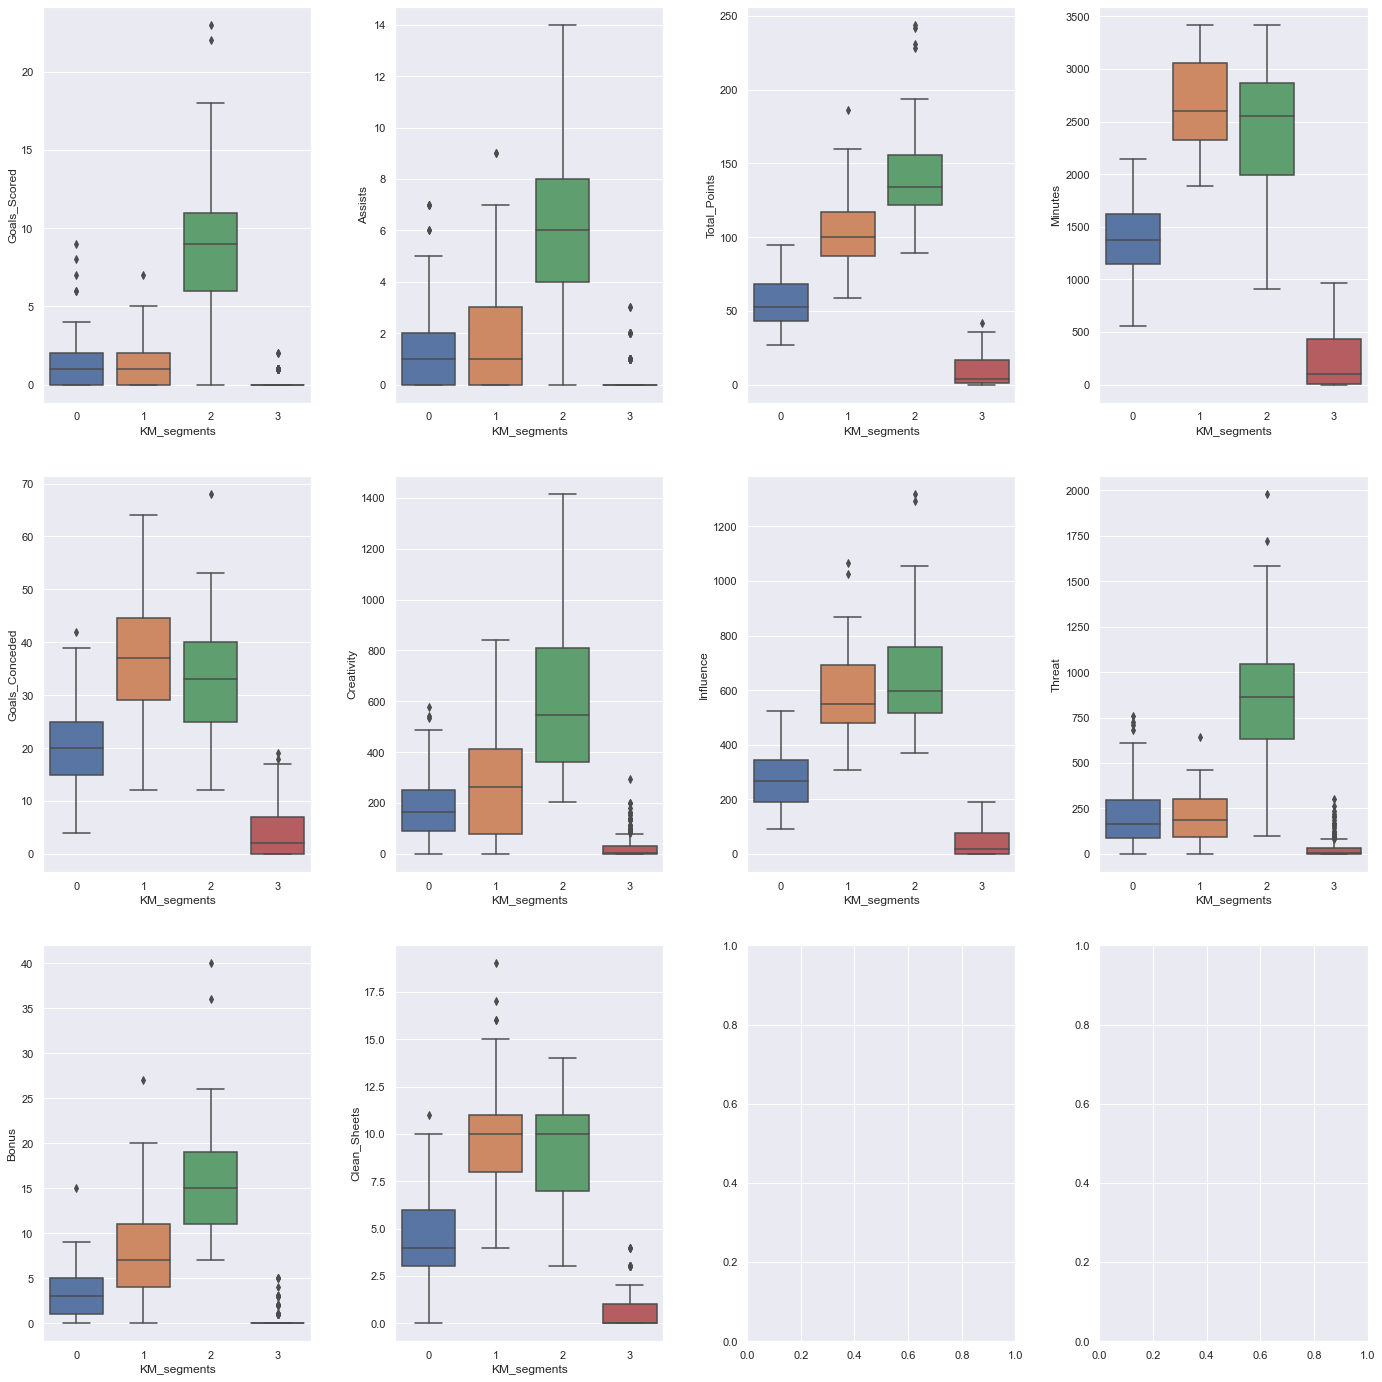

In [35]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

## **K-Medoids Clustering**

Centers the clusters around a data point rather than a mean, is more computationally expensive but can provide better results

In [36]:
kmed_df = data_pca.copy()

In [37]:
kmed = KMedoids(n_clusters = 4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [38]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] =  kmed.labels_

### **Cluster Profiling**

In [39]:
# Take the cluster-wise mean of all the variables. 
kmed_cluster_profile = df2.groupby("KMed_segments").mean()

In [40]:
# Create the "count_in_each_segment" column in K-Medoids cluster profile
kmed_cluster_profile["count_in_each_segment"] = (
    df2.groupby("KMed_segments")["Total_Points"].count().values
)


In [41]:
# Highlight the maximum average value among all the clusters for each of the variables

kmed_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


In [42]:
# Complete the code to print the players in each cluster. Hint: Use the KMed_segments feature
for cl in df2["KMed_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df2[df2["KMed_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury'
 'Jacob Ramsey' 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valentino Livramento'
 'Willy Caballero' 'Connor Wickham' 'Jack Butland' 'James McCarthy'
 'James Tomkins' 'Jean-Philippe Mateta' 

In [43]:
# Count number of players in each position for each cluster
df2.groupby(["KMed_segments", "Position"])['Player_Name'].count()

KMed_segments  Position  
0              Defender      12
               Forward       21
               Midfielder    49
1              Defender      49
               Goalkeeper    17
               Midfielder    21
2              Defender      50
               Forward       16
               Goalkeeper     3
               Midfielder    67
3              Defender      61
               Forward       27
               Goalkeeper    25
               Midfielder    58
Name: Player_Name, dtype: int64

In [44]:
# Count number of players in each cluster 
df2.groupby(["KMed_segments"])['Player_Name'].count()

KMed_segments
0     82
1     87
2    136
3    171
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

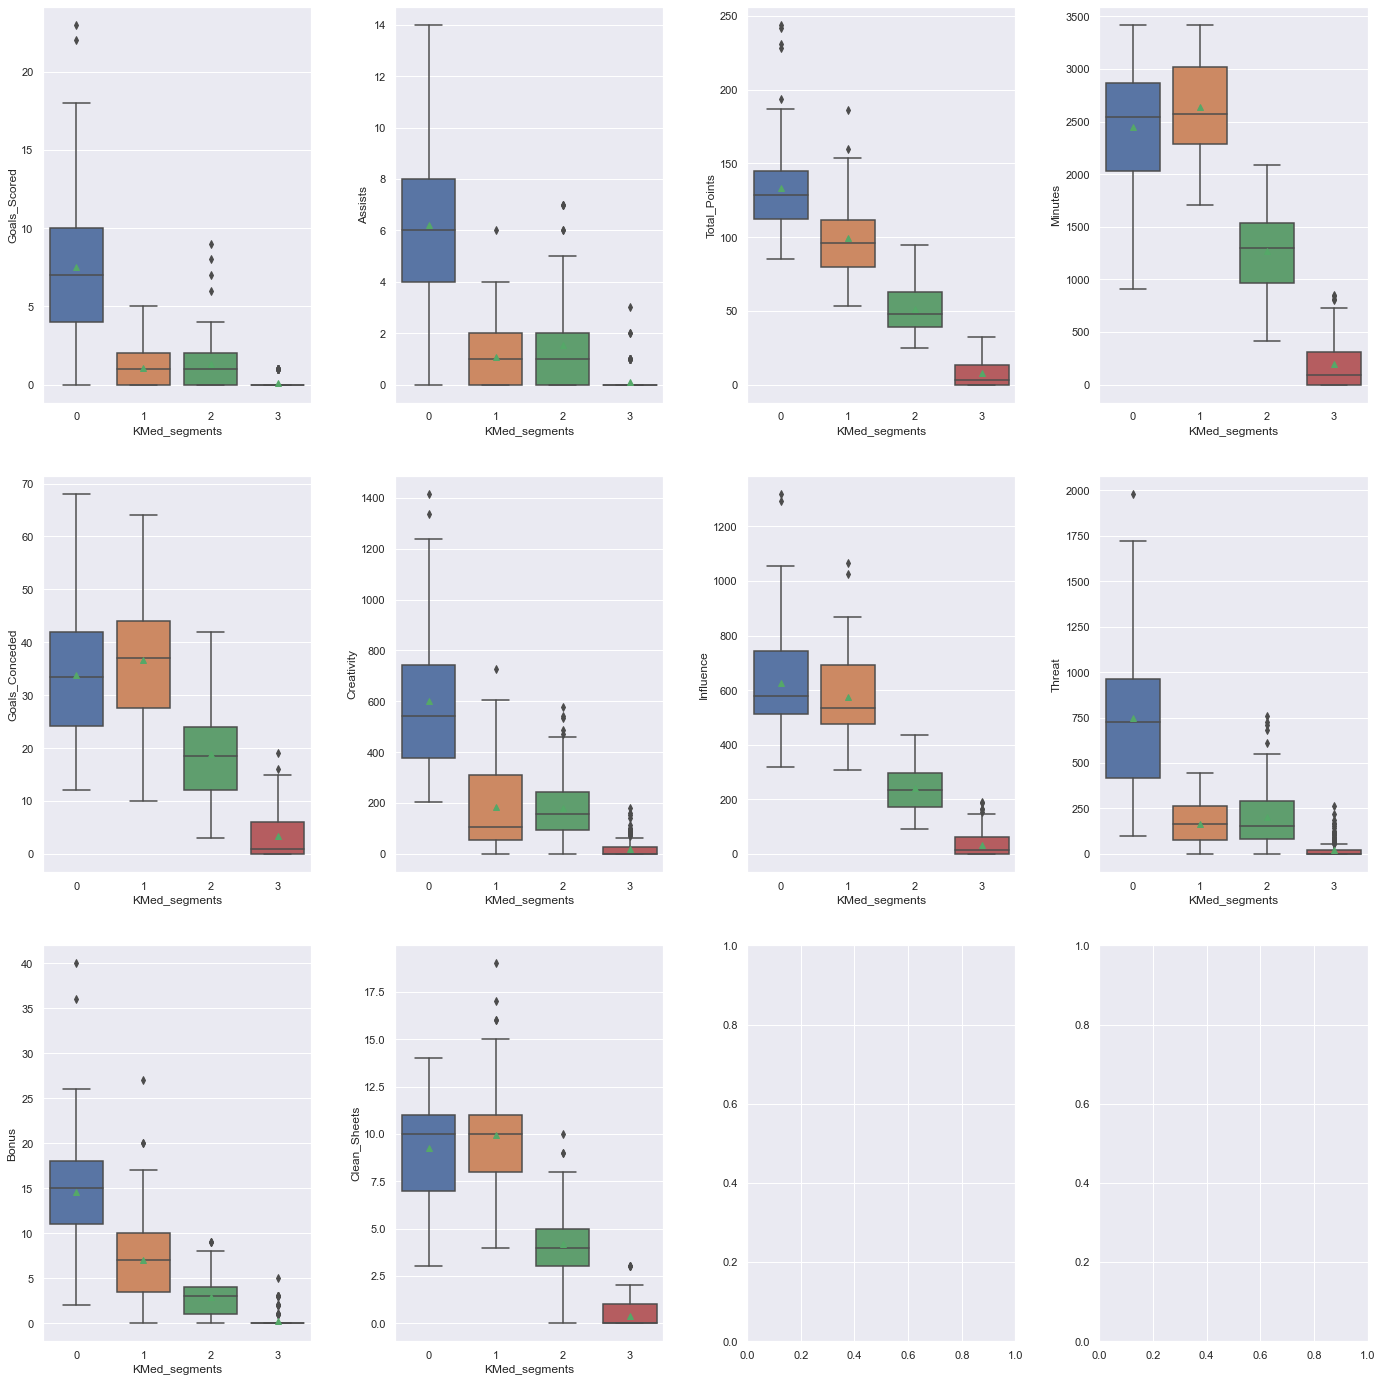

In [45]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2,
                y = df2.columns[3 + counter],
                x = "KMed_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

In [46]:
hc_df = data_pca.copy()

In [47]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228706.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261761.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585415.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067481.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111797.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.802839439063213.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302255.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639637.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132247.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434059.
Cophenetic cor

**Explore different linkage methods with Euclidean distance only.**

In [48]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228706.
Cophenetic correlation for complete linkage is 0.7412041292261761.
Cophenetic correlation for average linkage is 0.8476499945585415.
Cophenetic correlation for centroid linkage is 0.8068296032280465.
Cophenetic correlation for ward linkage is 0.577773844586155.
Cophenetic correlation for weighted linkage is 0.8624581351067481.
****************************************************************************************************
Highest cophenetic correlation is 0.8624581351067481, which is obtained with weighted linkage.


**Dendrograms for the different linkage methods with Euclidean distance only.**

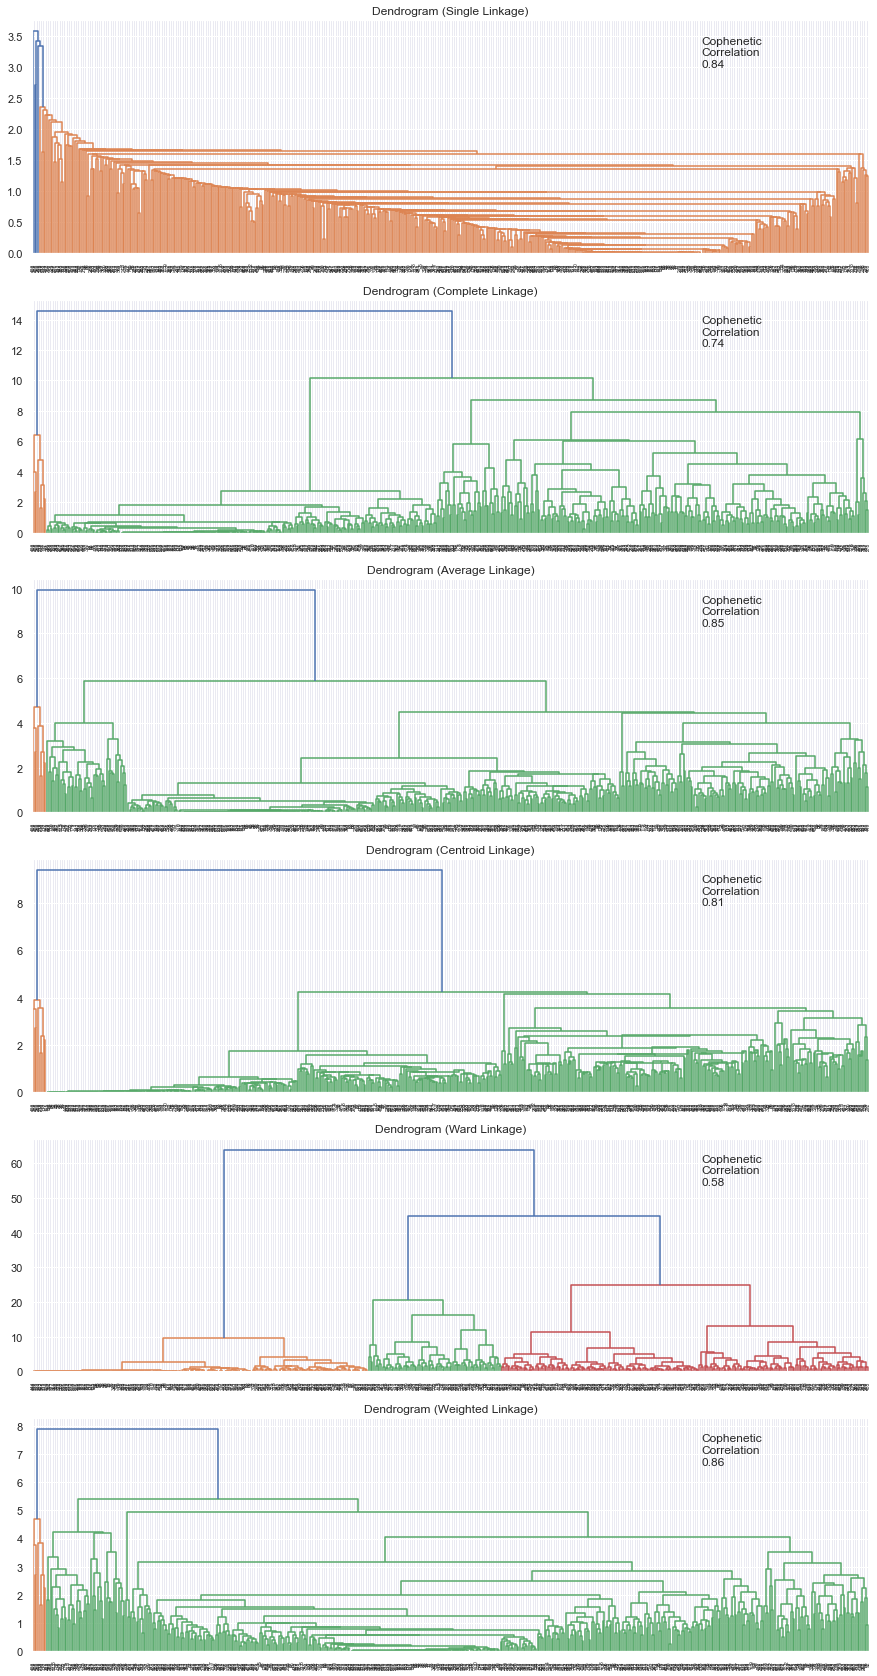

In [49]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [50]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


Use 4 clusters, euclidean distance, and average linkage (sklearn does not support weighted linkage so average is the next best option)

In [51]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' , linkage = 'average' )
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [52]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling (average linkage)**

In [53]:
# Take the cluster-wise mean of all the variables.
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [54]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [55]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [56]:
# Print the players in each cluster.
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Will try Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [57]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' , linkage = 'ward' )  # Complete the code to define the hierarchical clustering with Ward Linkage
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [58]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling (ward linkage)**

In [59]:
# Take the cluster-wise mean of all the variables. 
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [60]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [61]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [62]:
# Print the players in each cluster. Hint: Use the HC_segments feature
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

In [63]:
# check the postions of players in each group
df3.groupby(["HC_segments", "Position"])['Player_Name'].count()

HC_segments  Position  
0            Defender       1
             Forward       21
             Midfielder    32
1            Defender      38
             Forward       14
             Goalkeeper     3
             Midfielder    59
2            Defender      61
             Goalkeeper    17
             Midfielder    39
3            Defender      72
             Forward       29
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

In [64]:
# Count number of players in each cluster 
df3.groupby(["HC_segments"])['Player_Name'].count()

HC_segments
0     54
1    114
2    117
3    191
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

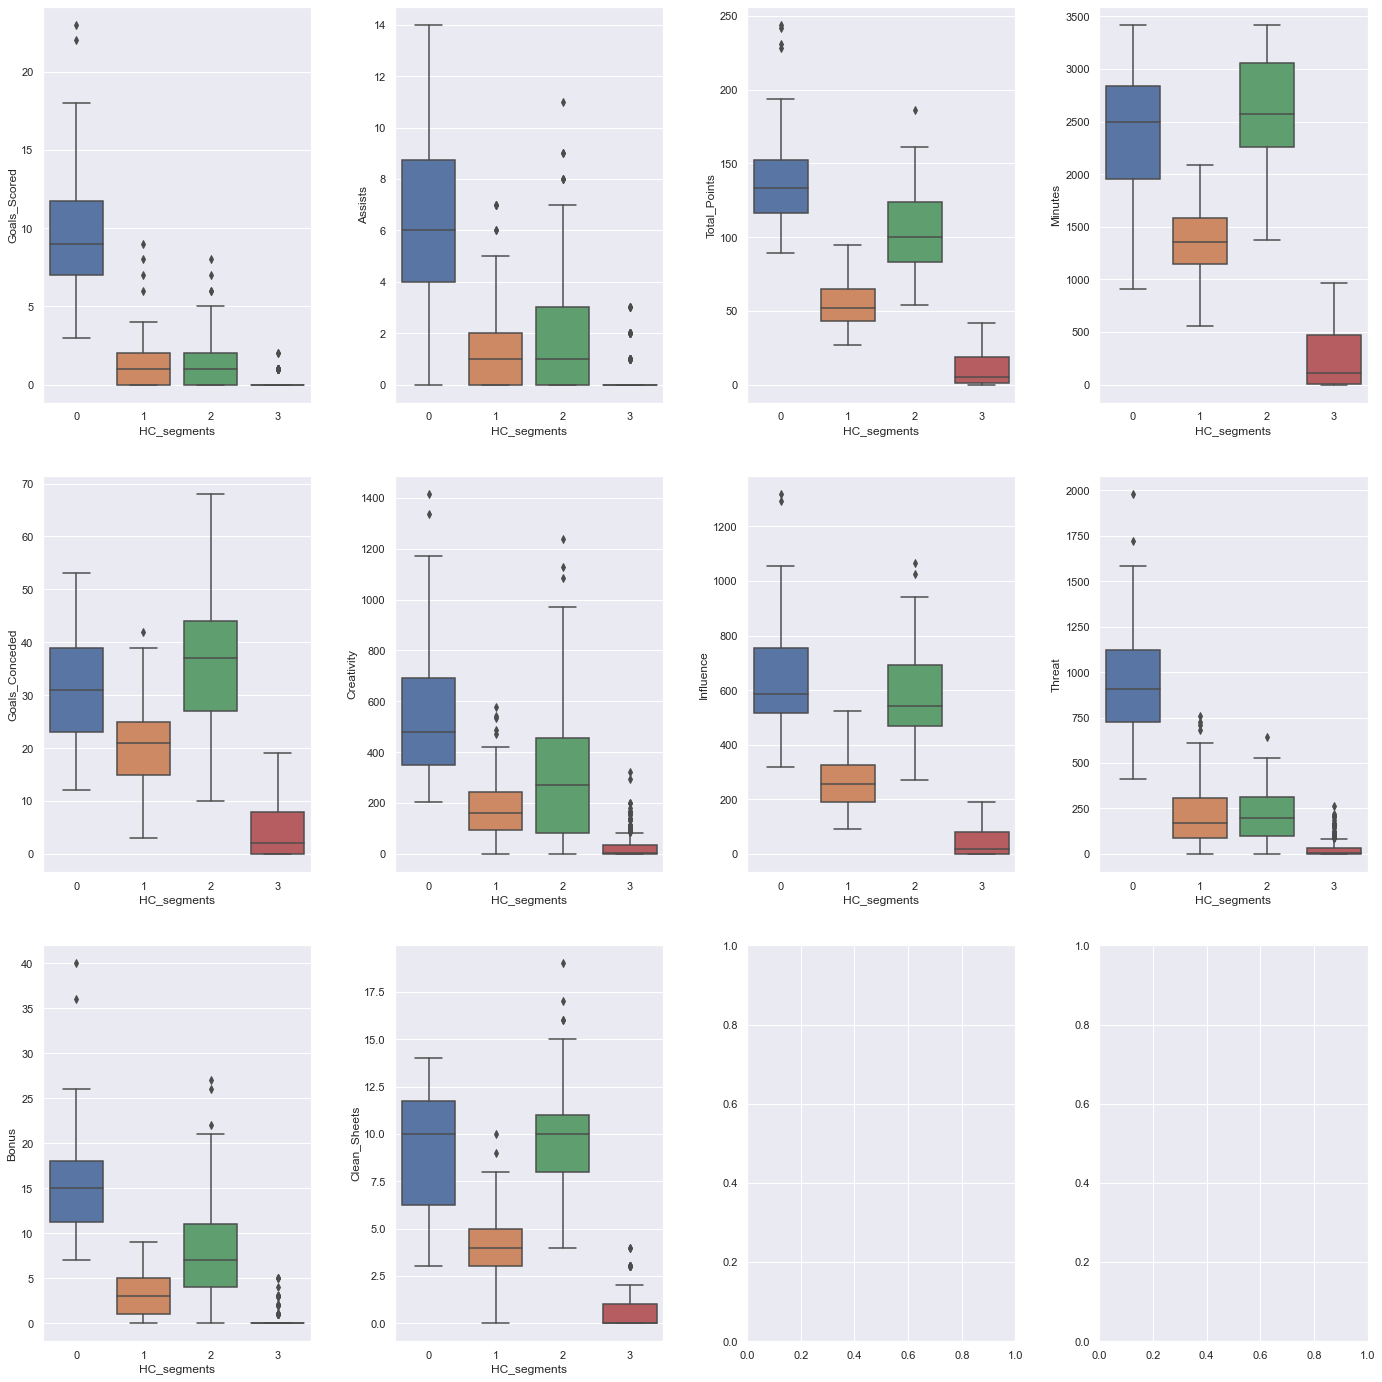

In [65]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

## **GMM clustering**

In [66]:
gmm_df = data_pca.copy()

In [67]:
gmm = GaussianMixture(n_components = 4 , random_state = 1) # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df) # Fit the Gaussian Mixture algorithm on the gmm_df

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [68]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [69]:
# Take the cluster-wise mean of all the variables.
gmm_cluster_profile = df4.groupby("GMM_segments").mean()


In [70]:
# Create the "count_in_each_segment" column in gmm cluster profile
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)

In [71]:
# Highlight the maximum average value among all the clusters for each of the variables
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [72]:
# Print the players in each cluster. Hint: Use the GMM_segments feature
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

In [73]:
# check the postions of players in each group
df4.groupby(["GMM_segments", "Position"])['Player_Name'].count()

GMM_segments  Position  
0             Defender      64
              Goalkeeper    18
              Midfielder    34
1             Defender      48
              Forward       21
              Goalkeeper    19
              Midfielder    38
2             Defender      10
              Forward       32
              Midfielder    63
3             Defender      50
              Forward       11
              Goalkeeper     8
              Midfielder    60
Name: Player_Name, dtype: int64

* Cluster 0 has no forwards and is likely the oposite to cluster 1, containing those with largely defensive positions. 
the other clusters are more balanced

In [74]:
# Count number of players in each cluster 
df4.groupby(["GMM_segments"])['Player_Name'].count()

GMM_segments
0    116
1    126
2    105
3    129
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

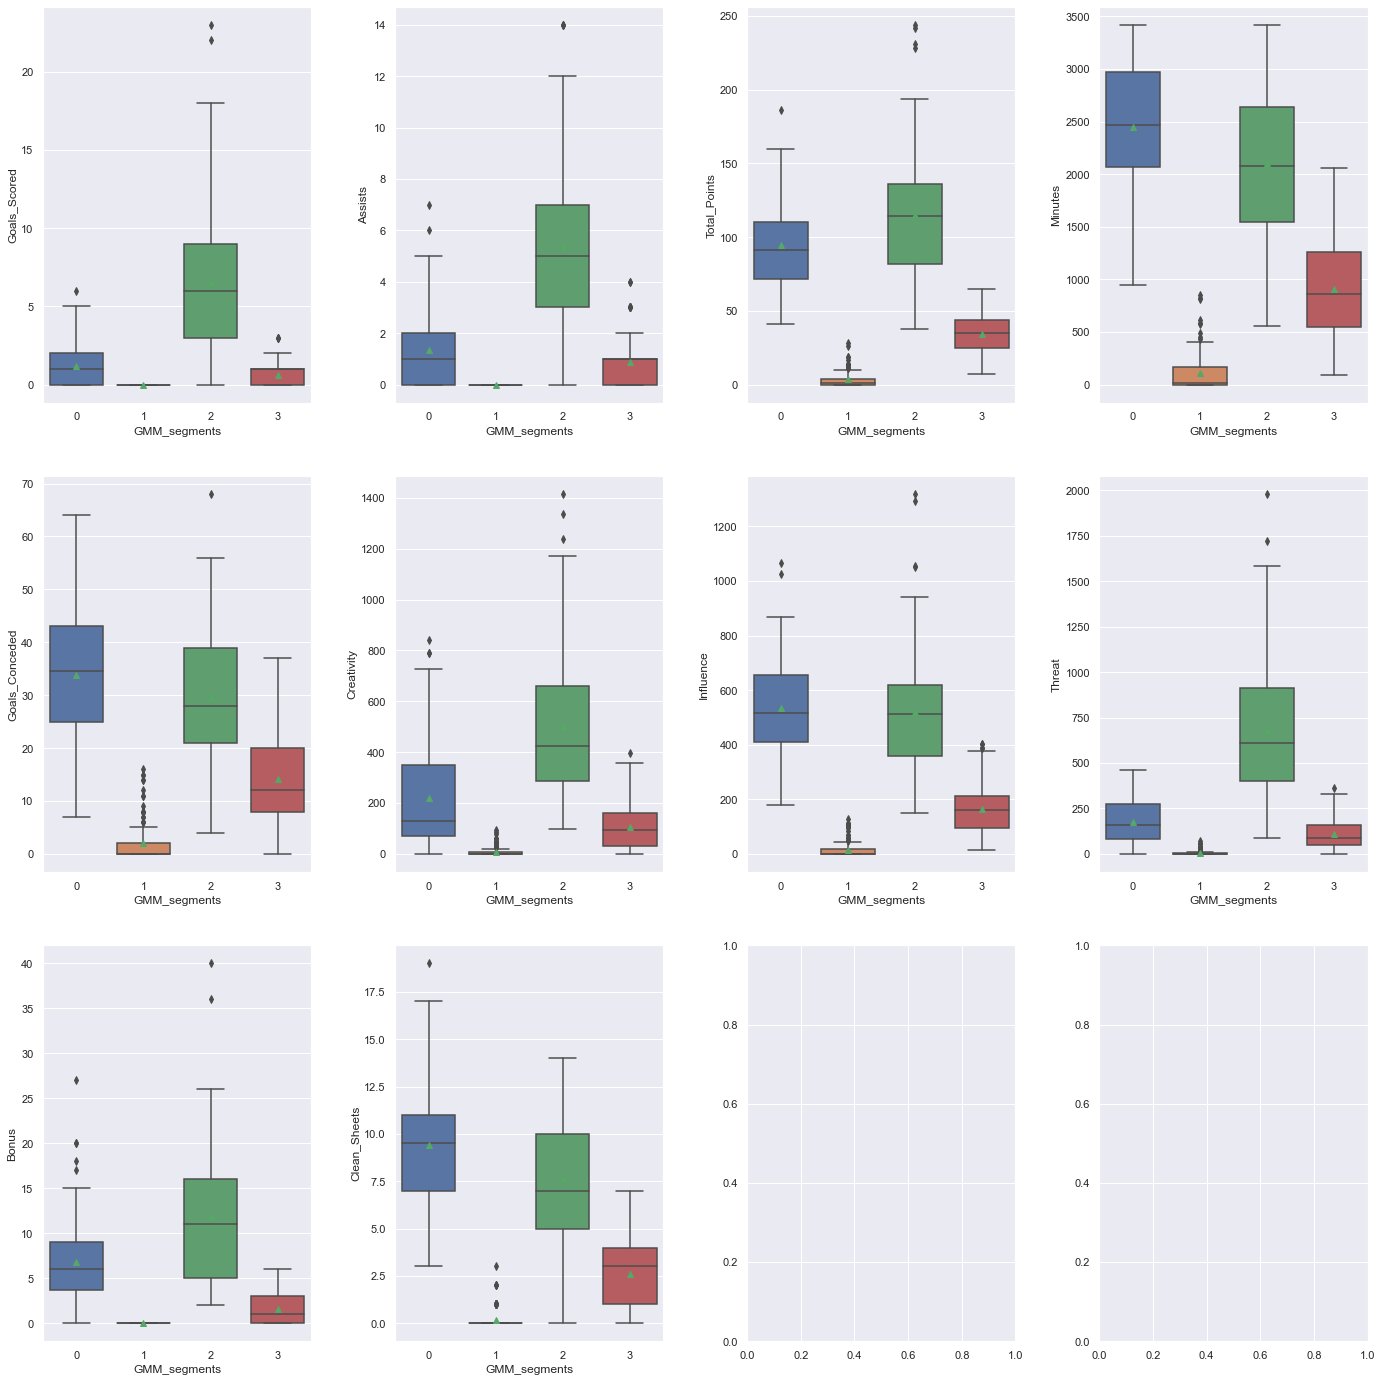

In [75]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

## **DBSCAN**

In [76]:
dbscan_df = data_pca.copy()

In [77]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [78]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5283008912823889
For eps value =2 For min sample =20 The average silhoutte_score is : 0.36478187516967553
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [79]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [80]:
# Applying DBSCAN with the hyperparmeter values that we got
dbs = DBSCAN(eps = 3, min_samples = 20)

In [81]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df["db_segments"] = dbs.fit_predict(dbscan_df)

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

### **Cluster Profiling**

In [82]:
# Take the cluster-wise mean of all the variables.
db_cluster_profile = df5.groupby("db_segments").mean()

In [83]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [84]:
# Highlight the maximum average value among all the clusters for each of the variables
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)


,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,470


* DBSCAN was able to give only two clusters with eps = 3 and min_sample = 20 which is very skewed.
* **It is not able perform well on this dataset.**

## **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [85]:
# Initializing K-Means with number of clusters as 4 and random_state = 1
kmeans = KMeans(n_clusters = 4, random_state = 1)  

# Fitting and predicting K-Means on data_pca
preds = kmeans.fit_predict((data_pca)) 

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)                

print(score)         

0.40413213643851853


In [86]:
# Initialize K-Medoids with number of clusters as 4 and random_state = 1
kmedoids = KMedoids(n_clusters = 4, random_state = 1)

# Fitting and predicting K-Medoids on data_pca
preds = kmedoids.fit_predict((data_pca))

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.393822499693573


In [87]:
# Initialize Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward",) 

# Fitting and predicting HC algorithm on data_pca  
preds = HCmodel.fit_predict(data_pca)  

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.3849709986025467


In [88]:
# Initialize Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)   

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds = gmm.fit_predict((data_pca))

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.2849464429730214


### **Results**

**Based on the silhouette score, we can see that K-Means algorithm is giving the best score on the data.**